# Phishing Domain Detection
---

# Installs
---

In [98]:
!pip install autoviz

In [99]:
!pip install -U autoviz

  Using cached autoviz-0.1.904-py3-none-any.whl (67 kB)
  Using cached autoviz-0.1.903-py3-none-any.whl (68 kB)


In [100]:
!pip install -q autoviz
!pip install -q -U --pre pycaret

In [101]:
!pip -q install transformers
!pip -q install torch

# Imports
---

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
# from autoviz.classify_method import data_suggestions
from pycaret import regression
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

# Data Loading
---

In [103]:
df = pd.read_csv('/kaggle/input/malicious-urls-dataset/malicious_phish.csv', nrows = 1000)

In [104]:
df.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [105]:
df.tail()

,url,type
995,youtube.com/watch?v=EcGsM-PNQHQ,benign
996,bloomberg.com/news/2011-08-28/dust-bowl-in-tex...,benign
997,http://www.slavia.sk/home,defacement
998,innerearbrigade.com/,benign
999,brokenbells.com/,benign


In [106]:
df.shape

(1000, 2)

# EDA 
---

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   url     1000 non-null   object
 1   type    1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


In [108]:
df.dtypes

url     object
type    object
dtype: object

In [109]:
# data_cleaning_suggestions(df)

# 1. Handling Categorical Values

In [110]:
from sklearn.preprocessing import LabelEncoder

In [111]:
# get list of categorical columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols

['url', 'type']

In [112]:
# Initialize the LabelEncoder
le = LabelEncoder()

# Fit and transform the data
encoded_data = le.fit_transform(df['type'])

print(encoded_data)

[3 0 0 1 1 0 0 0 1 0 0 1 0 1 1 1 0 0 0 1 0 3 0 0 0 0 0 0 3 0 0 0 0 0 0 1 0
 0 2 1 3 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 3 0
 0 0 0 0 0 0 1 0 0 0 0 0 1 3 0 0 1 0 0 0 3 0 1 0 0 1 0 1 0 0 1 3 3 0 0 0 0
 1 0 0 0 2 0 1 0 0 0 0 0 0 1 0 3 0 0 0 0 0 1 0 0 0 0 1 0 3 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 2 0 3 0 0 0 1 1 0 0 1 3 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 3 0 1 0 0 0 1 0 0 0 0 3 1 0 0 0 0 0 0 0 0 0 0 0 0 2 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 3 0 3 0 0 0 1 0 2 0 0 2 0 0 3 0 0 0 0 3 0 1 0 1 1 0 0
 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 1 0 0 0 0 0 0
 0 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 1 0 1 0
 0 0 0 1 1 0 2 0 0 0 3 0 0 0 0 0 3 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1
 0 2 0 0 0 0 0 0 0 3 1 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 3 0 1
 1 3 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 3 0 0 0 0 0 0 0 0 0 2 0 0 0
 0 1 0 0 0 1 2 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 3 3 3 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 

In [113]:
df

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement
...,...,...
995,youtube.com/watch?v=EcGsM-PNQHQ,benign
996,bloomberg.com/news/2011-08-28/dust-bowl-in-tex...,benign
997,http://www.slavia.sk/home,defacement
998,innerearbrigade.com/,benign


In [114]:
df['type'] = encoded_data

In [115]:
df

,url,type
0,br-icloud.com.br,3
1,mp3raid.com/music/krizz_kaliko.html,0
2,bopsecrets.org/rexroth/cr/1.htm,0
3,http://www.garage-pirenne.be/index.php?option=...,1
4,http://adventure-nicaragua.net/index.php?optio...,1
...,...,...
995,youtube.com/watch?v=EcGsM-PNQHQ,0
996,bloomberg.com/news/2011-08-28/dust-bowl-in-tex...,0
997,http://www.slavia.sk/home,1
998,innerearbrigade.com/,0


# 2. Handling Null Values

In [116]:
df.isnull().any()

url     False
type    False
dtype: bool

In [117]:
df.dtypes

url     object
type     int64
dtype: object

# 3. Class Distributions

In [118]:
# Count the number of instances in each class
class_counts = df['type'].value_counts()

# Print the class distribution
print('Class distribution:')
print(class_counts)

Class distribution:
0    734
1    181
3     54
2     31
Name: type, dtype: int64


<AxesSubplot:xlabel='type', ylabel='count'>

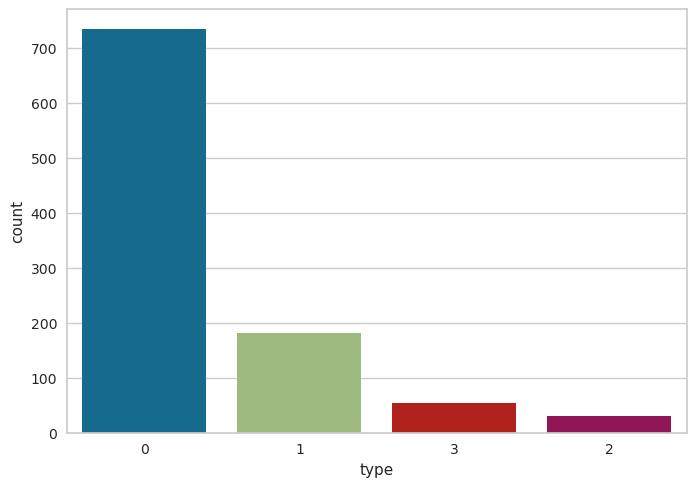

In [119]:
sns.countplot(x = 'type', data = df, order = df['type'].value_counts().index)

# Feature Extraction using Bert Model
---

In [120]:
from transformers import BertModel, BertTokenizer
import torch

# Load the pre-trained BERT model and tokenizer
model = BertModel.from_pretrained('bert-base-uncased', output_hidden_states=True)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [121]:
# Define a function to extract features for each transaction
def extract_features(text):
    # Tokenize the text
    input_ids = torch.tensor([tokenizer.encode(text, add_special_tokens=True)])
    # Get the hidden states for each token
    with torch.no_grad():
        outputs = model(input_ids)
        hidden_states = outputs[2]
    # Concatenate the last 4 hidden states
    token_vecs = []
    for layer in range(-4, 0):
        token_vecs.append(hidden_states[layer][0])
    # Calculate the mean of the last 4 hidden states
    features = []
    for token in token_vecs:
        features.append(torch.mean(token, dim=0))
    # Return the features as a tensor
    return torch.stack(features)

In [122]:
# Extract features for each transaction
features = []
for i in range(len(df)):
    features.append(extract_features(df.iloc[i]["url"]))
# Concatenate the features and convert to a numpy array
features = torch.cat(features).numpy()

In [123]:
features

array([[ 0.20866226, -0.301919  ,  0.0840515 , ..., -0.6917093 ,
         0.3264751 ,  0.46026862],
       [ 0.16422965, -0.33757493, -0.01675384, ..., -0.50350493,
         0.23100577,  0.60487694],
       [ 0.18217382, -0.2528902 , -0.06339672, ..., -0.271699  ,
         0.14275041,  0.47711945],
       ...,
       [ 0.56814843, -0.46876663, -0.2994224 , ..., -0.46464208,
        -0.07836804, -0.15953965],
       [ 0.6326016 , -0.4313939 , -0.3730044 , ..., -0.23353873,
        -0.17966652, -0.16202736],
       [ 0.62288463, -0.07720765, -0.41445488, ...,  0.06254075,
        -0.20890912, -0.17801058]], dtype=float32)

# Data Processing
---

In [124]:
types = df['type'].values
types

array([3, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 3,
       0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 3, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 3,
       0, 0, 1, 0, 0, 0, 3, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 3, 3, 0, 0, 0,
       0, 1, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 3, 0, 0, 0, 1, 1, 0, 0, 1, 3, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 1, 0, 2, 0,
       0, 2, 0, 0, 3, 0, 0, 0, 0, 3, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,

In [125]:
print(features.shape)
print(types.shape)

(4000, 768)
(1000,)


In [126]:
# features is a 2D numpy array of size 4000x768
# labels is a 1D numpy array of size 1000
# reshape the feature array to size 1000x(768*4)

features_reshaped = features.reshape((1000, -1))

# concatenate the feature array with the label array horizontally
dataset = np.hstack((features_reshaped, types.reshape((-1, 1))))

# dataset is a 2D numpy array of size 1000x(4000*768+1)

In [127]:
features_reshaped.shape

(1000, 3072)

In [128]:
dataset

array([[ 0.20866226, -0.30191901,  0.0840515 , ...,  0.09338004,
         0.28850076,  3.        ],
       [ 0.12214111, -0.14043541,  0.56440705, ..., -0.18797345,
        -0.1064833 ,  0.        ],
       [ 0.38706815, -0.0124125 ,  0.49862355, ..., -0.15056306,
         0.12027913,  0.        ],
       ...,
       [ 0.31936812, -0.52491599,  0.29337412, ..., -0.66254395,
         0.10896008,  1.        ],
       [ 0.66745079, -0.72515869,  0.37217623, ..., -0.12280724,
         0.2229275 ,  0.        ],
       [ 0.43090594, -0.41795352,  0.04056706, ..., -0.20890912,
        -0.17801058,  0.        ]])

In [129]:
dataset.shape

(1000, 3073)

# Data Splitting
---

In [130]:
from sklearn.model_selection import train_test_split

In [131]:
# Split the data into training and testing sets
train_data, test_data = train_test_split(dataset, test_size=0.2, random_state=42)

# Convert the training and testing sets back into separate feature and label arrays
X_train, y_train = train_data[:, :-1], train_data[:, -1]
X_test, y_test = test_data[:, :-1], test_data[:, -1]

# Balancing Classes using SMOTE
---

In [132]:
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE
sm = SMOTE(random_state=42)

# Fit SMOTE to training data
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

y_train_s = pd.Series(y_train)
y_train_res = pd.Series (y_train_res)

# Print class distribution of original and resampled data
print('Class distribution before resampling:', y_train_s.value_counts())
print('Class distribution after resampling:', y_train_res.value_counts())

Class distribution before resampling: 0.0    593
1.0    138
3.0     45
2.0     24
dtype: int64
Class distribution after resampling: 0.0    593
1.0    593
3.0    593
2.0    593
dtype: int64


# Logistic Regression Model
---

In [133]:
from sklearn.linear_model import LogisticRegression

# Train a logistic regression classifier on the training set
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [134]:
# Evaluate the classifier on the testing set
score = clf.score(X_test, y_test)
print("Accuracy:", score)

Accuracy: 0.96


#### Accuracy - 96%

# Model Performance
---

In [135]:
# Predict the labels of the testing set
y_pred = clf.predict(X_test)

In [136]:
from sklearn.metrics import confusion_matrix, classification_report

In [137]:
# Generate the confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

In [138]:
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[140   0   0   1]
 [  1  41   1   0]
 [  1   1   4   1]
 [  1   1   0   7]]


In [139]:
print("\nClassification Report:\n", cr)


Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       141
         1.0       0.95      0.95      0.95        43
         2.0       0.80      0.57      0.67         7
         3.0       0.78      0.78      0.78         9

    accuracy                           0.96       200
   macro avg       0.88      0.82      0.85       200
weighted avg       0.96      0.96      0.96       200

